In [153]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [154]:
X = pd.read_csv('nothot_audio.csv', index_col=0)
X1 = pd.read_csv('hot100_audio.csv', index_col=0)

In [155]:
## Adding Hot (H) and not-hot (N) tags
X["hot?"]="H"
X1["hot?"]="N"

In [156]:
# Concatenating both into the same dataframe
x=pd.concat([X, X1], ignore_index=True)

In [157]:
x.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'title', 'artist', 'hot?'],
      dtype='object')

In [158]:
x[["analysis_url"]]

,analysis_url
0,https://api.spotify.com/v1/audio-analysis/2374...
1,https://api.spotify.com/v1/audio-analysis/3iS4...
2,https://api.spotify.com/v1/audio-analysis/5hEM...
3,https://api.spotify.com/v1/audio-analysis/6ubp...
4,https://api.spotify.com/v1/audio-analysis/3Vlb...
...,...
3757,https://api.spotify.com/v1/audio-analysis/76OG...
3758,https://api.spotify.com/v1/audio-analysis/6ug9...
3759,https://api.spotify.com/v1/audio-analysis/7EAM...
3760,https://api.spotify.com/v1/audio-analysis/2lNT...


In [159]:
# Selecting only numerical columns for the K-means method
    X = x.select_dtypes(include=[np.number])

In [160]:
X.shape

(3762, 13)

In [161]:
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.671,0.373,9,-18.064,1,0.0323,0.257,0.000080,0.0481,0.732,92.718,295893,4
1,0.796,0.838,8,-5.157,1,0.0574,0.244,0.000000,0.3330,0.960,106.007,160745,4
2,0.760,0.838,7,-3.828,0,0.0529,0.547,0.000001,0.0664,0.745,93.050,210323,4
3,0.693,0.453,7,-8.262,1,0.0352,0.657,0.000000,0.1050,0.236,116.998,244256,4
4,0.681,0.372,5,-8.237,1,0.0432,0.640,0.000000,0.1690,0.476,91.873,201000,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.034782,-1.566586,1.002732,-4.452927,0.867302,-0.756121,-0.053987,-0.158933,-0.924329,0.946068,-0.995943,1.788866,0.143195
1,0.840624,1.139097,0.726355,0.484895,0.867302,-0.521516,-0.105622,-0.159889,1.165882,1.960755,-0.545757,-1.004848,0.143195
2,0.588507,1.139097,0.449977,0.993329,-1.153001,-0.563577,1.097854,-0.159874,-0.790069,1.003923,-0.984696,0.020004,0.143195
3,0.119289,-1.101092,0.449977,-0.702983,0.867302,-0.729015,1.534760,-0.159889,-0.506874,-1.261322,-0.173421,0.721451,0.143195
4,0.035250,-1.572404,-0.102778,-0.693419,0.867302,-0.654241,1.467238,-0.159889,-0.037328,-0.193230,-1.024568,-0.172716,0.143195


## Clustering the wines with K-Means

In [162]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [163]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    200
1    423
2    560
3    930
4    162
5     49
6    972
7    466
dtype: int64

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 68454.7538742175
Iteration 1, inertia 47389.34878100028
Iteration 2, inertia 46528.77002537278
Iteration 3, inertia 46021.9009439769
Iteration 4, inertia 45941.66597158944
Iteration 5, inertia 45923.37528909401
Iteration 6, inertia 45914.09572424588
Iteration 7, inertia 45902.71200194112
Iteration 8, inertia 45871.83473587961
Iteration 9, inertia 45800.91808274317
Iteration 10, inertia 45730.03578337756
Iteration 11, inertia 45672.98382527458
Iteration 12, inertia 45562.602478344794
Iteration 13, inertia 45279.41226810011
Iteration 14, inertia 44578.18010677985
Iteration 15, inertia 43745.7741593009
Iteration 16, inertia 43188.0601418409
Iteration 17, inertia 42876.27827675146
Iteration 18, inertia 42697.91622630233
Iteration 19, inertia 42608.62323488959
Iteration 20, inertia 42580.460296872836
Iteration 21, inertia 42561.469299133976
Iteration 22, inertia 42547.536989230175
Iteration 23, inertia 

Training a K-Means model with 4 clusters! 

Initialization complete
Iteration 0, inertia 56192.47471870869
Iteration 1, inertia 40017.31024559746
Iteration 2, inertia 37975.6956489301
Iteration 3, inertia 37483.54548025987
Iteration 4, inertia 37312.547268453316
Iteration 5, inertia 37229.71690436439
Iteration 6, inertia 37180.20809678589
Iteration 7, inertia 37157.13297053405
Iteration 8, inertia 37146.42775641928
Iteration 9, inertia 37135.59812939975
Iteration 10, inertia 37127.36065503925
Iteration 11, inertia 37122.99399474503
Iteration 12, inertia 37119.30517983415
Iteration 13, inertia 37117.23744398831
Iteration 14, inertia 37116.09491848975
Iteration 15, inertia 37115.01721402307
Iteration 16, inertia 37113.45689925347
Iteration 17, inertia 37111.40869772389
Iteration 18, inertia 37108.76527837959
Iteration 19, inertia 37105.47361662028
Iteration 20, inertia 37101.10129077202
Iteration 21, inertia 37096.52830820956
Iteration 22, inertia 37093.33392858715
Iteration 23, inertia 

Iteration 3, inertia 38299.167931631884
Iteration 4, inertia 38069.50038592024
Iteration 5, inertia 37959.939294204865
Iteration 6, inertia 37902.481231662605
Iteration 7, inertia 37880.78459302613
Iteration 8, inertia 37872.14438961651
Iteration 9, inertia 37867.4412316829
Iteration 10, inertia 37863.176964302686
Iteration 11, inertia 37861.49688300411
Iteration 12, inertia 37860.519070971604
Iteration 13, inertia 37860.17734402819
Converged at iteration 13: center shift 3.766884630418529e-05 within tolerance 9.999999999999999e-05.
Training a K-Means model with 5 clusters! 

Initialization complete
Iteration 0, inertia 53459.944645887284
Iteration 1, inertia 38213.75034372667
Iteration 2, inertia 36203.11891531873
Iteration 3, inertia 35693.08061760009
Iteration 4, inertia 35482.1265559402
Iteration 5, inertia 35385.05198416501
Iteration 6, inertia 35330.231458821676
Iteration 7, inertia 35303.190175752345
Iteration 8, inertia 35291.12158476638
Iteration 9, inertia 35282.48043601796
I

Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 48927.82058074292
Iteration 1, inertia 36135.10922554423
Iteration 2, inertia 34822.299288978946
Iteration 3, inertia 34250.93541102579
Iteration 4, inertia 33954.387636247855
Iteration 5, inertia 33788.225893690345
Iteration 6, inertia 33664.63133224528
Iteration 7, inertia 33516.12461474376
Iteration 8, inertia 33403.304413745194
Iteration 9, inertia 33325.04742646683
Iteration 10, inertia 33261.20070856508
Iteration 11, inertia 33214.53349667165
Iteration 12, inertia 33160.7817376006
Iteration 13, inertia 33123.92542323638
Iteration 14, inertia 33105.92554803859
Iteration 15, inertia 33096.6686428151
Iteration 16, inertia 33089.373167734164
Iteration 17, inertia 33085.91260417638
Iteration 18, inertia 33082.97574155957
Iteration 19, inertia 33080.895769074334
Iteration 20, inertia 33079.504887690826
Iteration 21, inertia 33078.58215800661
Iteration 22, inertia 33077.68959868945
Iteration 23, ine

Training a K-Means model with 7 clusters! 

Initialization complete
Iteration 0, inertia 47220.63902016006
Iteration 1, inertia 35309.665518281894
Iteration 2, inertia 33407.644791389255
Iteration 3, inertia 32698.58036058299
Iteration 4, inertia 32428.089116301577
Iteration 5, inertia 32313.998904714615
Iteration 6, inertia 32261.418434479183
Iteration 7, inertia 32224.5605402952
Iteration 8, inertia 32181.538946681583
Iteration 9, inertia 32145.96426456439
Iteration 10, inertia 32111.053813592134
Iteration 11, inertia 32099.55817200587
Iteration 12, inertia 32095.982332876785
Iteration 13, inertia 32092.936266164936
Iteration 14, inertia 32090.311693515643
Iteration 15, inertia 32088.01243743146
Iteration 16, inertia 32086.01624066993
Iteration 17, inertia 32084.570816241114
Iteration 18, inertia 32082.74985419982
Iteration 19, inertia 32080.224981149186
Iteration 20, inertia 32078.42100792129
Iteration 21, inertia 32076.905961335604
Iteration 22, inertia 32074.370872501608
Iteration

Iteration 0, inertia 46585.266506320346
Iteration 1, inertia 35842.24868259806
Iteration 2, inertia 34820.77786493989
Iteration 3, inertia 34356.676131314176
Iteration 4, inertia 34009.72572151932
Iteration 5, inertia 33737.37418985959
Iteration 6, inertia 33559.87994784095
Iteration 7, inertia 33452.94537129897
Iteration 8, inertia 33393.76157213699
Iteration 9, inertia 33359.98027128692
Iteration 10, inertia 33341.99013000719
Iteration 11, inertia 33333.52582870898
Iteration 12, inertia 33328.27857928584
Iteration 13, inertia 33325.109082939205
Iteration 14, inertia 33322.4385645148
Iteration 15, inertia 33319.381907134535
Iteration 16, inertia 33317.537886114565
Iteration 17, inertia 33315.30309621861
Iteration 18, inertia 33312.67311780799
Iteration 19, inertia 33310.24738397372
Iteration 20, inertia 33306.23179393686
Iteration 21, inertia 33299.80231662633
Iteration 22, inertia 33294.756595322266
Iteration 23, inertia 33289.65350467525
Iteration 24, inertia 33286.61901542048
Itera

Iteration 11, inertia 31887.68940212851
Iteration 12, inertia 31740.020704234073
Iteration 13, inertia 31389.788442261808
Iteration 14, inertia 30649.332719353795
Iteration 15, inertia 30134.816325631673
Iteration 16, inertia 30083.92394323482
Iteration 17, inertia 30071.296875519678
Iteration 18, inertia 30067.41151051317
Iteration 19, inertia 30066.36325796529
Iteration 20, inertia 30065.11674026966
Iteration 21, inertia 30064.232791850056
Iteration 22, inertia 30063.489358447725
Iteration 23, inertia 30062.581794133042
Iteration 24, inertia 30061.42568315921
Iteration 25, inertia 30059.721845739365
Iteration 26, inertia 30057.549243296096
Iteration 27, inertia 30055.34552264165
Iteration 28, inertia 30053.807621805707
Iteration 29, inertia 30051.49637995052
Iteration 30, inertia 30050.605269688727
Iteration 31, inertia 30049.492991987827
Iteration 32, inertia 30047.597829195198
Iteration 33, inertia 30045.49691625043
Iteration 34, inertia 30044.418263323576
Iteration 35, inertia 300

Iteration 30, inertia 28336.03296721518
Iteration 31, inertia 28334.40900740252
Iteration 32, inertia 28333.354333076968
Iteration 33, inertia 28332.84064029547
Iteration 34, inertia 28332.0984090063
Iteration 35, inertia 28330.758988292837
Iteration 36, inertia 28328.989072859767
Iteration 37, inertia 28327.49484624623
Iteration 38, inertia 28326.50343331524
Iteration 39, inertia 28326.364639506435
Iteration 40, inertia 28326.29413220947
Converged at iteration 40: strict convergence.
Training a K-Means model with 10 clusters! 

Initialization complete
Iteration 0, inertia 40155.19461663212
Iteration 1, inertia 32086.369109126426
Iteration 2, inertia 30535.7213709156
Iteration 3, inertia 29914.65991495001
Iteration 4, inertia 29588.31632571298
Iteration 5, inertia 29438.277306454296
Iteration 6, inertia 29329.823746655726
Iteration 7, inertia 29237.102611052233
Iteration 8, inertia 29156.776488728003
Iteration 9, inertia 29077.726632778376
Iteration 10, inertia 29007.145401940186
Itera

Iteration 39, inertia 28266.902669670013
Iteration 40, inertia 28261.255683434316
Iteration 41, inertia 28255.24216878617
Iteration 42, inertia 28251.031311712468
Iteration 43, inertia 28248.402825597557
Iteration 44, inertia 28247.47040970033
Iteration 45, inertia 28247.103150275427
Iteration 46, inertia 28246.717088679277
Iteration 47, inertia 28246.171834435656
Iteration 48, inertia 28245.924977010385
Iteration 49, inertia 28245.843713013648
Converged at iteration 49: center shift 8.74769361219993e-05 within tolerance 9.999999999999999e-05.
Initialization complete
Iteration 0, inertia 44753.813579864596
Iteration 1, inertia 32606.953013729253
Iteration 2, inertia 31442.031647876713
Iteration 3, inertia 30943.1607403612
Iteration 4, inertia 30578.526359631604
Iteration 5, inertia 30189.61101375077
Iteration 6, inertia 29592.312008277564
Iteration 7, inertia 28614.842675414766
Iteration 8, inertia 28138.714481707877
Iteration 9, inertia 28049.53212098797
Iteration 10, inertia 27994.50

Iteration 24, inertia 27255.24323755413
Iteration 25, inertia 27254.99202751232
Iteration 26, inertia 27254.354346752043
Iteration 27, inertia 27254.28882722671
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 38095.04850056503
Iteration 1, inertia 29670.799460563478
Iteration 2, inertia 28812.050721079187
Iteration 3, inertia 28244.29309619343
Iteration 4, inertia 27791.640207523214
Iteration 5, inertia 27491.301744465978
Iteration 6, inertia 27332.29542859697
Iteration 7, inertia 27249.166065861617
Iteration 8, inertia 27206.773876794403
Iteration 9, inertia 27181.503904349433
Iteration 10, inertia 27156.378021682096
Iteration 11, inertia 27130.64527570475
Iteration 12, inertia 27103.156129739094
Iteration 13, inertia 27085.540170665925
Iteration 14, inertia 27070.654967912396
Iteration 15, inertia 27052.876653481835
Iteration 16, inertia 27032.311127240475
Iteration 17, inertia 27011.982411468336
Iteration 18, inertia 26990.74342989043
Iter

Iteration 4, inertia 26729.87574205383
Iteration 5, inertia 26614.103873302858
Iteration 6, inertia 26534.52092485672
Iteration 7, inertia 26469.929248747918
Iteration 8, inertia 26413.751457244696
Iteration 9, inertia 26370.61752647283
Iteration 10, inertia 26343.588626658588
Iteration 11, inertia 26324.277721229922
Iteration 12, inertia 26310.903934845883
Iteration 13, inertia 26302.134587090008
Iteration 14, inertia 26296.211621608083
Iteration 15, inertia 26291.391078661232
Iteration 16, inertia 26287.97355823475
Iteration 17, inertia 26284.07242142173
Iteration 18, inertia 26282.106726171594
Iteration 19, inertia 26281.601596563763
Iteration 20, inertia 26281.42694869625
Iteration 21, inertia 26281.0053698834
Iteration 22, inertia 26280.34091123062
Iteration 23, inertia 26279.99764332205
Iteration 24, inertia 26279.698479718125
Iteration 25, inertia 26279.23905243387
Iteration 26, inertia 26278.774569478002
Iteration 27, inertia 26277.882433038903
Iteration 28, inertia 26277.27589

Iteration 25, inertia 25854.724677390226
Iteration 26, inertia 25849.686394875855
Iteration 27, inertia 25843.25114471104
Iteration 28, inertia 25838.873417323994
Iteration 29, inertia 25835.30957089886
Iteration 30, inertia 25831.588033244512
Iteration 31, inertia 25828.400440788228
Iteration 32, inertia 25824.853193342453
Iteration 33, inertia 25821.191314763368
Iteration 34, inertia 25811.453213965244
Iteration 35, inertia 25799.634222841658
Iteration 36, inertia 25786.3570619046
Iteration 37, inertia 25775.3250819749
Iteration 38, inertia 25769.704857316563
Iteration 39, inertia 25763.487784078236
Iteration 40, inertia 25759.025395297507
Iteration 41, inertia 25755.574739880132
Iteration 42, inertia 25754.08145756086
Iteration 43, inertia 25753.495222496862
Iteration 44, inertia 25753.218229299313
Iteration 45, inertia 25752.97287601432
Iteration 46, inertia 25752.558964772616
Iteration 47, inertia 25752.107013536715
Iteration 48, inertia 25751.182836668355
Iteration 49, inertia 25

Iteration 58, inertia 25513.25926967852
Iteration 59, inertia 25513.119718697475
Iteration 60, inertia 25513.059745212984
Iteration 61, inertia 25512.935393738255
Iteration 62, inertia 25512.893141850414
Converged at iteration 62: strict convergence.
Initialization complete
Iteration 0, inertia 35867.86636793191
Iteration 1, inertia 28057.337272910238
Iteration 2, inertia 26968.104817149113
Iteration 3, inertia 26245.819778279525
Iteration 4, inertia 25896.56582187899
Iteration 5, inertia 25725.482142417583
Iteration 6, inertia 25636.104555828068
Iteration 7, inertia 25576.025725812535
Iteration 8, inertia 25531.69527046223
Iteration 9, inertia 25492.819425504233
Iteration 10, inertia 25453.95406626378
Iteration 11, inertia 25420.59565211778
Iteration 12, inertia 25390.608376146654
Iteration 13, inertia 25371.03225109248
Iteration 14, inertia 25352.547168167166
Iteration 15, inertia 25338.289219194157
Iteration 16, inertia 25322.75160266546
Iteration 17, inertia 25312.04143570759
Itera

Iteration 9, inertia 25079.27279987106
Iteration 10, inertia 25051.954393150183
Iteration 11, inertia 25036.61152435449
Iteration 12, inertia 25027.641492006154
Iteration 13, inertia 25018.431252807302
Iteration 14, inertia 25011.622141601496
Iteration 15, inertia 25006.678862833982
Iteration 16, inertia 25001.338694787035
Iteration 17, inertia 24998.165878564017
Iteration 18, inertia 24996.969115508342
Iteration 19, inertia 24996.350148157235
Iteration 20, inertia 24995.62464530147
Iteration 21, inertia 24995.225930244043
Iteration 22, inertia 24994.98505962473
Iteration 23, inertia 24994.600988737307
Iteration 24, inertia 24994.047779812616
Iteration 25, inertia 24993.78907686079
Iteration 26, inertia 24993.428588408333
Iteration 27, inertia 24993.266743504704
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 34562.643365352815
Iteration 1, inertia 28054.3348927572
Iteration 2, inertia 26987.441047383843
Iteration 3, inertia 26351.89635505234

Initialization complete
Iteration 0, inertia 34344.93079254928
Iteration 1, inertia 27484.80376051637
Iteration 2, inertia 25960.10163065744
Iteration 3, inertia 25303.57567603519
Iteration 4, inertia 24964.13088267332
Iteration 5, inertia 24781.439621616777
Iteration 6, inertia 24668.05647690974
Iteration 7, inertia 24601.20360343156
Iteration 8, inertia 24534.059663439097
Iteration 9, inertia 24489.17958717517
Iteration 10, inertia 24461.889605485103
Iteration 11, inertia 24447.939665147307
Iteration 12, inertia 24438.02762879447
Iteration 13, inertia 24428.33793942846
Iteration 14, inertia 24421.67537727476
Iteration 15, inertia 24418.102961756365
Iteration 16, inertia 24416.985559955938
Iteration 17, inertia 24416.54776752194
Iteration 18, inertia 24416.247821863304
Iteration 19, inertia 24416.090001273926
Iteration 20, inertia 24415.975495981816
Iteration 21, inertia 24415.908320538707
Iteration 22, inertia 24415.841809836544
Converged at iteration 22: center shift 8.3718485956938

Iteration 40, inertia 23915.51678691664
Iteration 41, inertia 23915.378941934254
Iteration 42, inertia 23915.110308443116
Iteration 43, inertia 23914.922862350126
Iteration 44, inertia 23914.62285152806
Iteration 45, inertia 23914.370840910895
Iteration 46, inertia 23914.153782726775
Iteration 47, inertia 23914.055980655263
Iteration 48, inertia 23913.99810997465
Iteration 49, inertia 23913.955731772417
Converged at iteration 49: strict convergence.
Initialization complete
Iteration 0, inertia 34496.51225201532
Iteration 1, inertia 27269.99524267675
Iteration 2, inertia 26509.497679359225
Iteration 3, inertia 25755.506469045817
Iteration 4, inertia 24996.73311251872
Iteration 5, inertia 24673.201217260386
Iteration 6, inertia 24455.591574753023
Iteration 7, inertia 24335.268143904123
Iteration 8, inertia 24265.29273807687
Iteration 9, inertia 24204.22331877816
Iteration 10, inertia 24154.79551790945
Iteration 11, inertia 24128.577123589344
Iteration 12, inertia 24101.95902720904
Iterat

Iteration 4, inertia 24435.714376141732
Iteration 5, inertia 24272.187852641022
Iteration 6, inertia 24145.71503101477
Iteration 7, inertia 24049.173245109567
Iteration 8, inertia 23985.691382817942
Iteration 9, inertia 23953.87054016201
Iteration 10, inertia 23937.249929031917
Iteration 11, inertia 23925.154205800347
Iteration 12, inertia 23915.074025622627
Iteration 13, inertia 23904.473737953733
Iteration 14, inertia 23897.416764613954
Iteration 15, inertia 23893.08508171286
Iteration 16, inertia 23889.743320254816
Iteration 17, inertia 23883.287006466264
Iteration 18, inertia 23877.205984730957
Iteration 19, inertia 23874.179907701306
Iteration 20, inertia 23872.216180073505
Iteration 21, inertia 23869.406182072773
Iteration 22, inertia 23863.840374220563
Iteration 23, inertia 23856.855456982597
Iteration 24, inertia 23847.578962166626
Iteration 25, inertia 23840.239703062318
Iteration 26, inertia 23836.14537728218
Iteration 27, inertia 23831.756044486094
Iteration 28, inertia 2382

Initialization complete
Iteration 0, inertia 31746.605867178587
Iteration 1, inertia 25041.25983182239
Iteration 2, inertia 24353.34340314418
Iteration 3, inertia 24107.564522545737
Iteration 4, inertia 23931.7312334654
Iteration 5, inertia 23784.73220452404
Iteration 6, inertia 23645.072783213527
Iteration 7, inertia 23538.877694159804
Iteration 8, inertia 23474.62994171586
Iteration 9, inertia 23430.91167283526
Iteration 10, inertia 23398.310544723907
Iteration 11, inertia 23376.861307113424
Iteration 12, inertia 23358.527197618838
Iteration 13, inertia 23345.347161948255
Iteration 14, inertia 23334.81392835593
Iteration 15, inertia 23326.626673076258
Iteration 16, inertia 23322.45138155158
Iteration 17, inertia 23316.760014952783
Iteration 18, inertia 23309.568996729216
Iteration 19, inertia 23302.634651751032
Iteration 20, inertia 23297.02838123386
Iteration 21, inertia 23294.075284620834
Iteration 22, inertia 23291.1257189866
Iteration 23, inertia 23289.225299828027
Iteration 24, 

Iteration 14, inertia 23405.90296427349
Iteration 15, inertia 23381.084612567378
Iteration 16, inertia 23343.60545321161
Iteration 17, inertia 23273.27462333441
Iteration 18, inertia 23215.788018564177
Iteration 19, inertia 23191.27377647198
Iteration 20, inertia 23174.118862173495
Iteration 21, inertia 23160.476595630917
Iteration 22, inertia 23148.86175673303
Iteration 23, inertia 23136.788206778612
Iteration 24, inertia 23123.089127277563
Iteration 25, inertia 23111.361270773734
Iteration 26, inertia 23104.000713041758
Iteration 27, inertia 23097.710117337356
Iteration 28, inertia 23093.097013002152
Iteration 29, inertia 23087.568960437337
Iteration 30, inertia 23079.38811583615
Iteration 31, inertia 23073.238283917657
Iteration 32, inertia 23069.497810367175
Iteration 33, inertia 23067.558380414826
Iteration 34, inertia 23066.38670676087
Iteration 35, inertia 23065.48073724871
Iteration 36, inertia 23064.207490869616
Iteration 37, inertia 23061.47380137632
Iteration 38, inertia 230

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

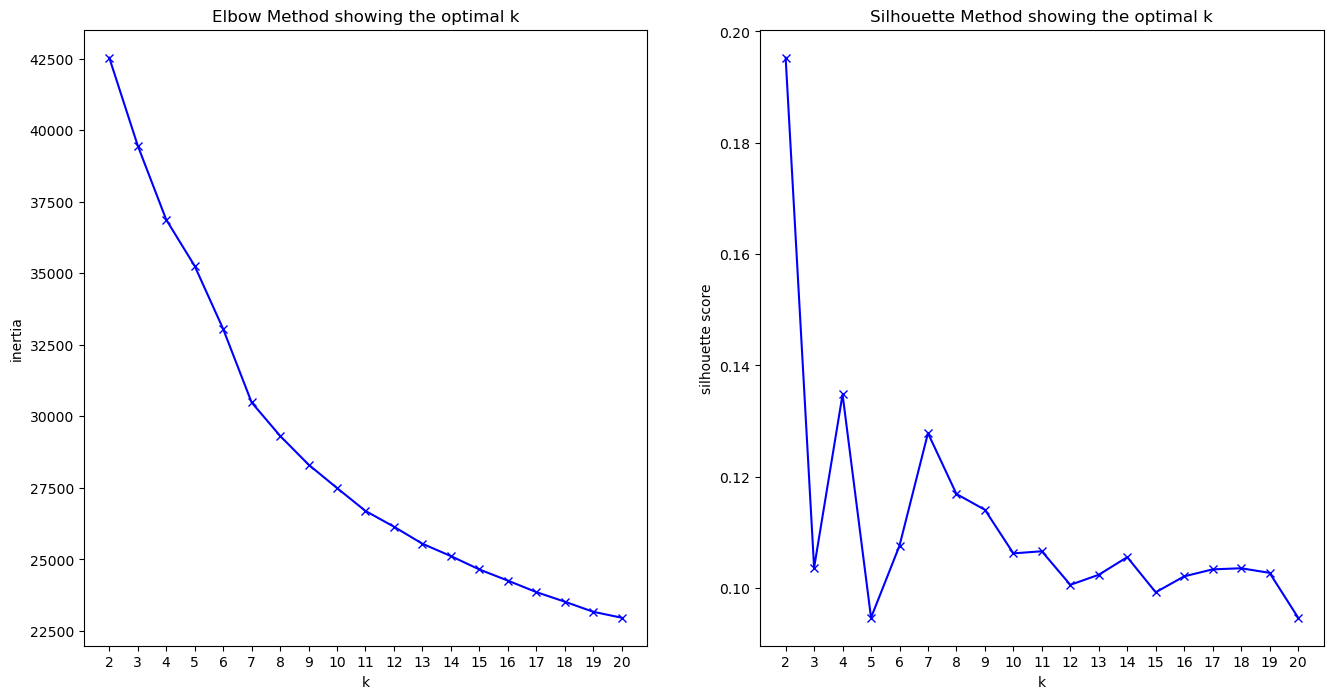

In [164]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [ ]:
#As we can see, the elbow method is no good for us to choose a cluster amount, so we will go with the 19 clusters suggested by
#the silhouette score

In [165]:
kmeans = KMeans(n_clusters=19, random_state=1234)
kmeans.fit(X_scaled_df)
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     161
1     171
2     370
3     259
4     145
5     105
6     226
7     175
8     135
9      47
10    225
11    117
12    203
13    219
14    252
15    212
16    372
17    359
18      9
dtype: int64

In [166]:
X_scaled_df["cluster"] = clusters+1
X_scaled_df["artist"] = x[["artist"]]
X_scaled_df["title"] = x[["title"]]
X_scaled_df["hot?"] = x[["hot?"]]
X_scaled_df["url"] = x[["track_href"]]
X_scaled_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,artist,title,hot?,url
0,-0.034782,-1.566586,1.002732,-4.452927,0.867302,-0.756121,-0.053987,-0.158933,-0.924329,0.946068,-0.995943,1.788866,0.143195,12,toto,africa,H,https://api.spotify.com/v1/tracks/2374M0fQpWi3...
1,0.840624,1.139097,0.726355,0.484895,0.867302,-0.521516,-0.105622,-0.159889,1.165882,1.960755,-0.545757,-1.004848,0.143195,3,agapornis,baila,H,https://api.spotify.com/v1/tracks/3iS4VBJ3Bg1H...
2,0.588507,1.139097,0.449977,0.993329,-1.153001,-0.563577,1.097854,-0.159874,-0.790069,1.003923,-0.984696,0.020004,0.143195,18,piso 21,me llamas (feat. maluma) - remix,H,https://api.spotify.com/v1/tracks/5hEM0JchdVzQ...
3,0.119289,-1.101092,0.449977,-0.702983,0.867302,-0.729015,1.534760,-0.159889,-0.506874,-1.261322,-0.173421,0.721451,0.143195,14,jinny ng,別再記起 - 劇集 “誇世代” 片尾曲,H,https://api.spotify.com/v1/tracks/6ubpI11SUVhY...
4,0.035250,-1.572404,-0.102778,-0.693419,0.867302,-0.654241,1.467238,-0.159889,-0.037328,-0.193230,-1.024568,-0.172716,0.143195,11,sam smith,too good at goodbyes,H,https://api.spotify.com/v1/tracks/3VlbOrM6nYPp...


In [167]:
X_scaled_df.to_csv('db.csv')

In [131]:
X_scaled_df["cluster"].value_counts()

7    1186
3    1095
5     594
2     438
6     237
4     162
1      50
Name: cluster, dtype: int64

In [ ]:
# Even though in the end we decided to go with the k-means method, we ran a DBScan to check and compare between them.

## DBScan

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [14]:
#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled_np = scaler.transform(X)
#X_scaled_df = pd.DataFrame(X_scaled_np, columns=X.columns)
model = DBSCAN(eps=3) # eps=0.30, min_samples=9: Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
#model.fit(X)
#yhat = model.predict(X)
yhat = model.fit_predict(X_scaled_df)

In [15]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  0.2


In [16]:
yhat

array([ 0,  0,  0, ...,  0,  0, -1], dtype=int64)

In [17]:
X['cluster'] = yhat
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.671,0.373,9,-18.064,1,0.0323,0.257,0.000080,0.0481,0.732,92.718,295893,4,0
1,0.796,0.838,8,-5.157,1,0.0574,0.244,0.000000,0.3330,0.960,106.007,160745,4,0
2,0.760,0.838,7,-3.828,0,0.0529,0.547,0.000001,0.0664,0.745,93.050,210323,4,0
3,0.693,0.453,7,-8.262,1,0.0352,0.657,0.000000,0.1050,0.236,116.998,244256,4,0
4,0.681,0.372,5,-8.237,1,0.0432,0.640,0.000000,0.1690,0.476,91.873,201000,4,0


In [18]:
# retrieve unique clusters
clusters = np.unique(yhat)
clusters # DBSCAN flags with "-1" noisy data.

array([-1,  0,  1,  2], dtype=int64)

In [19]:
d = distance_matrix(X_scaled_df,X_scaled_df)
print(d)
print()

[[ 0.          6.76579898  6.78973837 ...  6.126062    5.91019999
  15.17292594]
 [ 6.76579898  0.          3.44481319 ...  3.47486129  4.45188186
  13.46916288]
 [ 6.78973837  3.44481319  0.         ...  2.31325595  4.23648859
  14.03599173]
 ...
 [ 6.126062    3.47486129  2.31325595 ...  0.          4.0930705
  13.90541013]
 [ 5.91019999  4.45188186  4.23648859 ...  4.0930705   0.
  14.22641386]
 [15.17292594 13.46916288 14.03599173 ... 13.90541013 14.22641386
   0.        ]]



In [20]:
d2 = np.sort(d)[:,1:]
print(d2)

[[ 2.34238539  2.75213846  3.23231803 ... 13.08686606 13.23315921
  15.17292594]
 [ 1.4158329   1.4158329   1.504548   ... 13.46916288 14.44263422
  16.16610985]
 [ 0.94595703  1.23197835  1.35681854 ... 14.03599173 14.29465027
  15.34059653]
 ...
 [ 0.98631218  1.07544221  1.08833072 ... 13.90541013 14.01495095
  15.10752801]
 [ 1.35364995  1.66828196  1.67682147 ... 13.40827181 14.22641386
  15.21996238]
 [ 6.00714294  6.39050129  6.4394916  ... 16.09485187 16.40443422
  16.7736077 ]]


In [21]:
f = d2[:,25]
print(f) # The distances between every point and it's 4th nearest neighbour.

[4.01940536 2.08222834 1.81393848 ... 1.6090397  2.25354329 8.89937787]


In [22]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[10.69219652  8.89937787  8.78856533 ...  1.28172236  1.26431292
  1.26064908]


C:\Users\hugoa\AppData\Local\Temp\ipykernel_16416\270027386.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


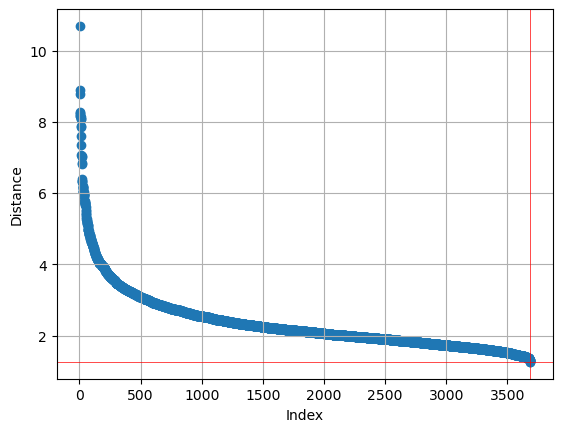

In [23]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid(b=True)
plt.show()

In [27]:
np.arange(3,4,0.01)

array([3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 ,
       3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.41, 3.42, 3.43,
       3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54,
       3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.61, 3.62, 3.63, 3.64, 3.65,
       3.66, 3.67, 3.68, 3.69, 3.7 , 3.71, 3.72, 3.73, 3.74, 3.75, 3.76,
       3.77, 3.78, 3.79, 3.8 , 3.81, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87,
       3.88, 3.89, 3.9 , 3.91, 3.92, 3.93, 3.94, 3.95, 3.96, 3.97, 3.98,
       3.99])

In [30]:
models = {}

for value in np.arange(3,4,0.01):
    model = DBSCAN(eps=value, min_samples=26) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df)
    score =  round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}


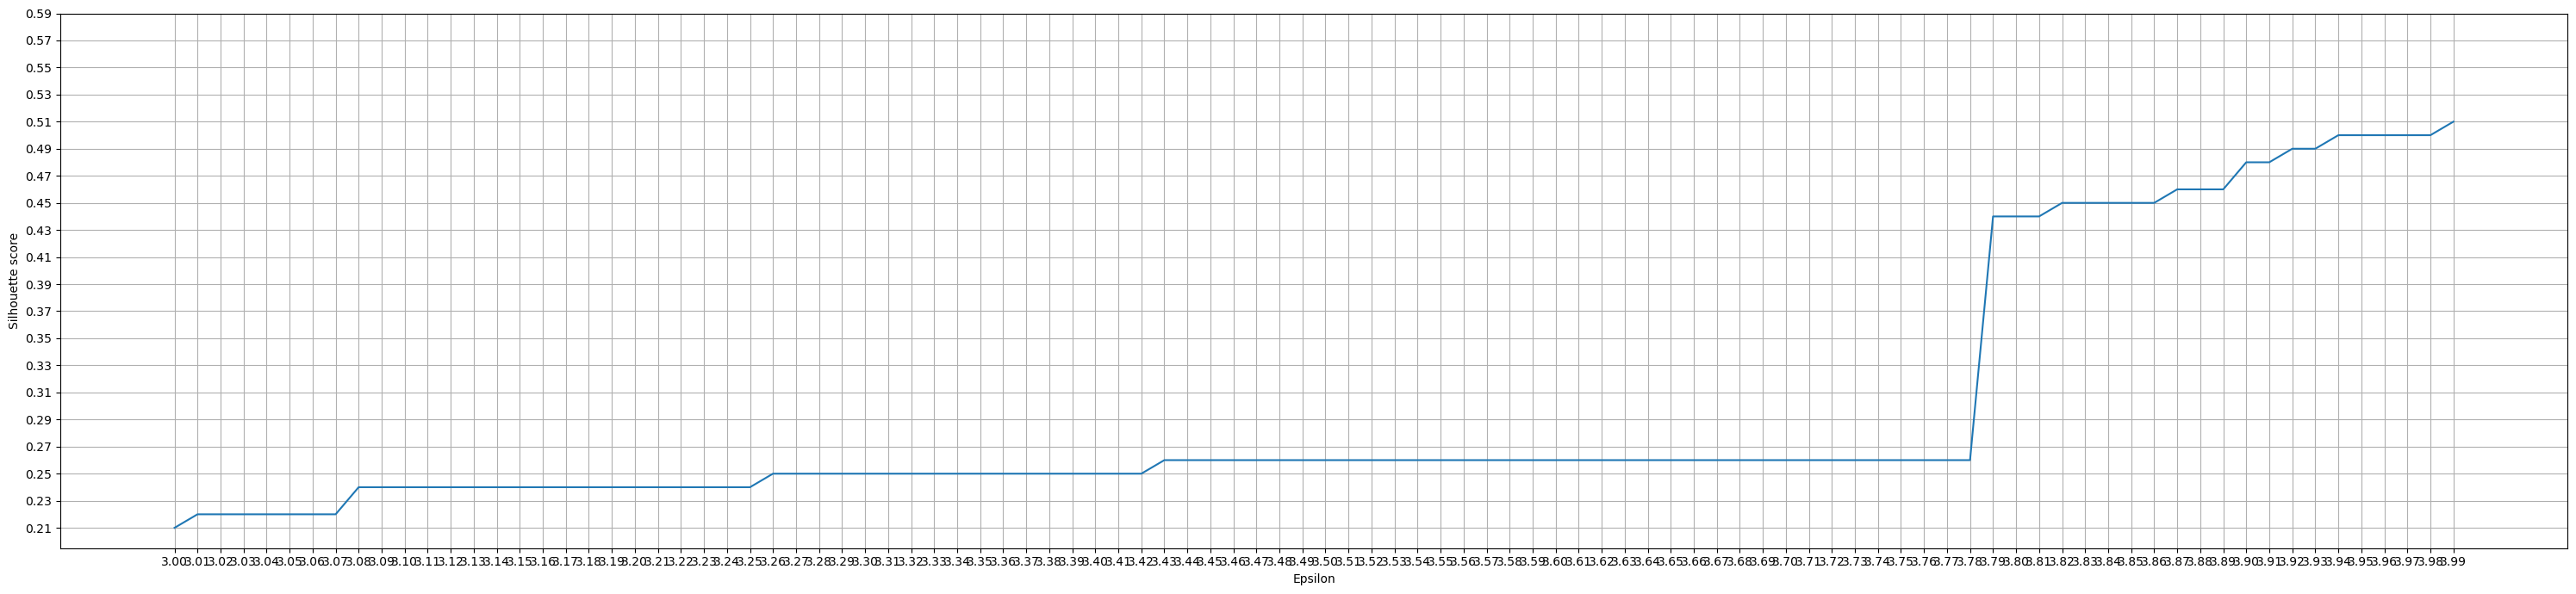

In [35]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(3,4,0.01)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(30,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.01))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.02))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()